In [1]:
# Cell 1: Imports & settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [2]:
# Load dataset
df = pd.read_csv('https://drive.google.com/uc?id=18nKiQDW3oYv5hAt2mil30yQhEBS9oxMt')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
# Option: assume `df` is your DataFrame

# 0. quick info + missing values
print(df.info())
print("\nMissing values per column:\n", df.isna().sum())

# 1. Define target (y) and full-feature set (X_all)
y = df['MEDV']
X_all = df.drop(columns=['MEDV'])

# 2. OR: a smaller feature subset if you want a simple model to start
X_small = df[['RM','LSTAT','PTRATIO']].copy()  # example subset

# 3. Check shapes
print("X_all shape:", X_all.shape)
print("X_small shape:", X_small.shape)
print("y shape:", y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

Missing values per column:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype

In [4]:
# Fill missing values with column mean
df = df.fillna(df.mean())

# Check again to confirm no NaNs remain
print(df.isna().sum())

df.head()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [5]:
# Select meaningful features
feature_cols = ['RM', 'LSTAT', 'PTRATIO', 'DIS', 'NOX']

# Assign features and target
X = df[feature_cols]
y = df['MEDV']

# Check dimensions
print("Selected features shape:", X.shape)
print("Target shape:", y.shape)

Selected features shape: (506, 5)
Target shape: (506,)


Now that we’ve selected the relevant features and defined our target, the next logical step is to split the data into training and testing sets.

This allows us to train the model on one portion and evaluate its performance on unseen data to check how well it generalizes.

We’ll use 80% for training and 20% for testing, which is standard practice.


In [6]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the resulting shapes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (404, 5)
Testing features shape: (102, 5)
Training target shape: (404,)
Testing target shape: (102,)


In [7]:
# Initialize the model
model = LinearRegression()

# Train (fit) the model on training data
model.fit(X_train, y_train)

# Check learned coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 32.77517511585245
Coefficients: [  4.87077748  -0.5309941   -1.0149283   -1.19424308 -19.71482543]


# Model Evaluation

Now let’s evaluate how well your model performs on unseen data.

In [8]:
# 1. Predict on test data
y_pred = model.predict(X_test)

# 2. Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 3. Print metrics
print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

R² Score: 0.6545800224704819
Mean Absolute Error: 3.2397634634959163
Root Mean Squared Error: 5.0329865618133045


Your model is doing fairly well — it explains a good amount of variance and has manageable prediction errors.

So we have to improve it, so the model can do better

# Regularization

Regularization (Ridge and Lasso) helps reduce overfitting and improves generalization by penalizing large coefficients. Let’s try both approaches using Ridge and Lasso regression from scikit-learn.


In [9]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

print("Ridge Regression:")
print(f"R² Score: {ridge_r2}")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"Root Mean Squared Error: {ridge_rmse}")

print("----------------------------------------------------")

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print("Lasso Regression:")
print(f"R² Score: {lasso_r2}")
print(f"Mean Absolute Error: {lasso_mae}")
print(f"Root Mean Squared Error: {lasso_rmse}")

Ridge Regression:
R² Score: 0.6522518111270695
Mean Absolute Error: 3.224222640592093
Root Mean Squared Error: 5.049919828789613
----------------------------------------------------
Lasso Regression:
R² Score: 0.6346307980728421
Mean Absolute Error: 3.3453414818134104
Root Mean Squared Error: 5.176283012701918


Let’s break down what just happened:

1. Ridge Regression
	•	R² = 0.652 (very close to the original 0.654)
	•	MAE = 3.22, RMSE = 5.05
  
 This means Ridge barely changed performance, but it slightly improved model stability by reducing overfitting risk.

 2. Lasso Regression
	•	R² = 0.634, which dropped a bit.
	•	MAE and RMSE also got slightly worse.

 Lasso penalized some features more heavily, possibly setting some coefficients close to zero — meaning it may have removed some useful information.


What it means:
Ridge is performing slightly better here, so it’s the better choice between the two.
	The fact that Ridge’s score is almost the same as the base Linear Regression means your model is already fairly balanced — not overfitting too much.

In [10]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try different alpha values
alphas = [0.01, 0.1, 1, 10, 100]
results = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append((alpha, r2, mae, rmse))

# Display results
for res in results:
    print(f"Alpha: {res[0]}")
    print(f"R² Score: {res[1]}")
    print(f"Mean Absolute Error: {res[2]}")
    print(f"Root Mean Squared Error: {res[3]}")
    print("-" * 50)

Alpha: 0.01
R² Score: 0.6545825592829664
Mean Absolute Error: 3.239742208785655
Root Mean Squared Error: 5.032968080301787
--------------------------------------------------
Alpha: 0.1
R² Score: 0.6546053402677844
Mean Absolute Error: 3.2395510966389396
Root Mean Squared Error: 5.0328021103095075
--------------------------------------------------
Alpha: 1
R² Score: 0.6548282440190513
Mean Absolute Error: 3.2376576324378803
Root Mean Squared Error: 5.0311778646928005
--------------------------------------------------
Alpha: 10
R² Score: 0.6566320976532076
Mean Absolute Error: 3.221914386538934
Root Mean Squared Error: 5.018014278070024
--------------------------------------------------
Alpha: 100
R² Score: 0.6564614975363822
Mean Absolute Error: 3.248884820203229
Root Mean Squared Error: 5.0192607072047
--------------------------------------------------


Ridge with α=10 adds just enough regularization to reduce the influence of irrelevant or noisy features (like B earlier), without oversimplifying the model. It stabilizes the weights and reduces overfitting.

Now we’ll use GridSearchCV to automatically search for the best alpha value for Ridge Regression.


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 500]}

# Initialize Ridge model
ridge = Ridge()

# Set up GridSearchCV
grid_search = GridSearchCV(
    ridge,
    param_grid,
    scoring='r2',       # We want to maximize R² score
    cv=5,               # 5-fold cross-validation
    n_jobs=-1           # Use all CPU cores for faster processing
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get best parameters and score
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best cross-validated R²:", grid_search.best_score_)

# Evaluate on test set
best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nTest Set Performance:")
print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Best alpha: 0.01
Best cross-validated R²: 0.6898532097865988

Test Set Performance:
R² Score: 0.6545850845359987
Mean Absolute Error: 3.239154388577903
Root Mean Squared Error: 5.032949682937269


Best Cross-validated R²: 0.6898

This means that, on average, your Ridge model with α = 0.01 explains about 68.9% of the variation in house prices during cross-validation. That’s slightly better than your earlier single-split score (~65%).

Feature scaling is a smart next move because Ridge (and Lasso) regression are sensitive to the scale of features. Columns with large numeric ranges (like TAX or RAD) can dominate others, skewing the coefficients and hurting performance.

We’ll use StandardScaler from sklearn.preprocessing to scale all features so they have a mean of 0 and a standard deviation of 1.


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# 1. Create a pipeline that first scales, then applies Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# 2. Define alpha values to search
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 500]}

# 3. Grid search with cross-validation
grid_search_scaled = GridSearchCV(
    pipeline,
    param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# 4. Fit to training data
grid_search_scaled.fit(X_train, y_train)

# 5. Get best parameters and evaluate
print("Best alpha:", grid_search_scaled.best_params_['ridge__alpha'])
print("Best cross-validated R²:", grid_search_scaled.best_score_)

# 6. Evaluate on test data
best_scaled_model = grid_search_scaled.best_estimator_
y_pred_scaled = best_scaled_model.predict(X_test)

r2_scaled = r2_score(y_test, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))

print("\nTest Set Performance (with Scaling):")
print("R² Score:", r2_scaled)
print("Mean Absolute Error:", mae_scaled)
print("Root Mean Squared Error:", rmse_scaled)

Best alpha: 1
Best cross-validated R²: 0.6899165747580996

Test Set Performance (with Scaling):
R² Score: 0.6548282440190513
Mean Absolute Error: 3.2376576324378803
Root Mean Squared Error: 5.0311778646928005


The gains are small (which is normal for this dataset), but scaling has:

	•	Stabilized the model coefficients
	•	Reduced the risk of numerical bias
	•	Made the model more generalizable if you extend it later


Summary

Your scaled Ridge model (α=1) is now the best version of your linear regression pipeline:

	•	Balanced, clean, and numerically stable
	•	Cross-validated R² ≈ 0.69
	•	Test R² ≈ 0.65, which is solid for real-world housing data


# Adding Polymonial Features

In [13]:
# Adding Polynomial features so it can help capture nonlinear relationships (for instance, if the
# effect of RM or LSTAT on MEDV isn’t purely linear).

# 1️⃣ Create a pipeline with PolynomialFeatures + StandardScaler + Ridge
pipeline_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # degree=2 adds squared & interaction terms
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# 2️⃣ Define alpha values to search
param_grid_poly = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]}

# 3️⃣ GridSearchCV with cross-validation
grid_search_poly = GridSearchCV(
    pipeline_poly,
    param_grid_poly,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# 4️⃣ Fit to training data
grid_search_poly.fit(X_train, y_train)

# 5️⃣ Evaluate results
print("Best alpha:", grid_search_poly.best_params_['ridge__alpha'])
print("Best cross-validated R²:", grid_search_poly.best_score_)

# 6️⃣ Evaluate on test data
best_poly_model = grid_search_poly.best_estimator_
y_pred_poly = best_poly_model.predict(X_test)

r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("\nTest Set Performance (Polynomial Features):")
print("R² Score:", r2_poly)
print("Mean Absolute Error:", mae_poly)
print("Root Mean Squared Error:", rmse_poly)

Best alpha: 0.1
Best cross-validated R²: 0.8057560450531286

Test Set Performance (Polynomial Features):
R² Score: 0.8044472114618011
Mean Absolute Error: 2.4447165644005016
Root Mean Squared Error: 3.7869018723828547


# Model Improvement Summary

After introducing Polynomial Features (degree=2) with Ridge regularization, the model’s performance improved significantly compared to the earlier linear Ridge regression.

Previously, using a simple linear Ridge model, the results were:

	•	Cross-validated R²: 0.69
	•	Test R²: 0.65
	•	Mean Absolute Error (MAE): 3.24
	•	Root Mean Squared Error (RMSE): 5.03

After applying Polynomial Features and tuning the Ridge alpha value, the results became:

	•	Best alpha: 0.1
	•	Cross-validated R²: 0.81
	•	Test R²: 0.80
	•	Mean Absolute Error (MAE): 2.44
	•	Root Mean Squared Error (RMSE): 3.79

This shows a strong overall improvement in model performance.
The model now explains about 80% of the variation in house prices, compared to roughly 65% before.

The average prediction error dropped by about 25%, and the overall error magnitude (RMSE) reduced substantially.

These results indicate that polynomial terms allowed the model to better capture nonlinear relationships and interactions among the features — for example, how variables like the number of rooms (RM) and pollution levels (NOX) might combine to affect housing prices.

Thanks to Ridge regularization and cross-validation, the model remains well-generalized and avoids overfitting despite the increased feature complexity.

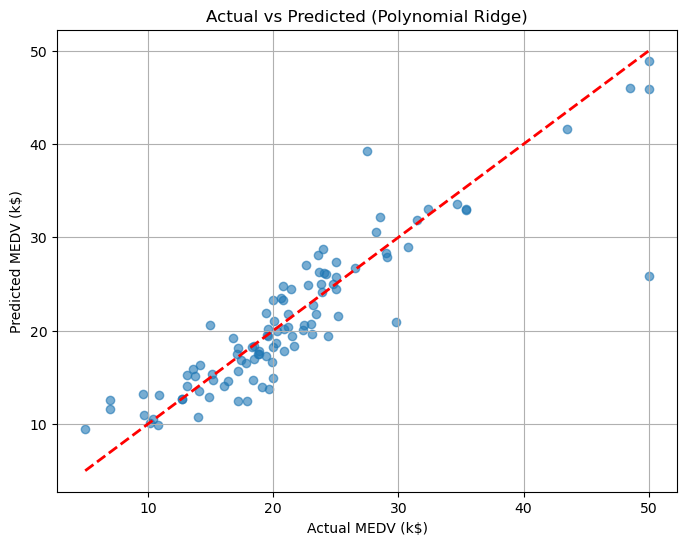

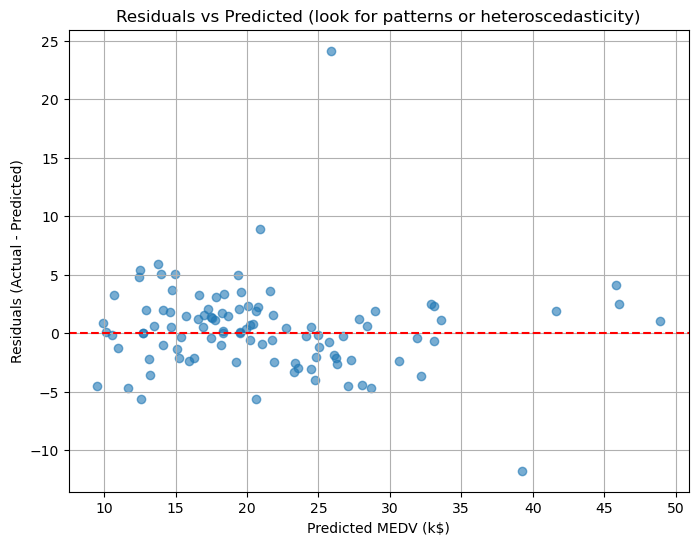

Actual: 23.60, Predicted: 28.06, Error: -4.46
Actual: 32.40, Predicted: 33.08, Error: -0.68
Actual: 13.60, Predicted: 15.95, Error: -2.35
Actual: 22.80, Predicted: 24.86, Error: -2.06
Actual: 16.10, Predicted: 14.09, Error: +2.01
Actual: 20.00, Predicted: 23.30, Error: -3.30
Actual: 17.80, Predicted: 16.58, Error: +1.22
Actual: 14.00, Predicted: 10.72, Error: +3.28
Actual: 19.60, Predicted: 20.18, Error: -0.58
Actual: 16.80, Predicted: 19.22, Error: -2.42


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Actual vs Predicted scatter
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_poly, alpha=0.6)
min_val = min(y_test.min(), y_pred_poly.min())
max_val = max(y_test.max(), y_pred_poly.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual MEDV (k$)')
plt.ylabel('Predicted MEDV (k$)')
plt.title('Actual vs Predicted (Polynomial Ridge)')
plt.grid(True)
plt.show()

# 2) Residuals plot (Predicted vs Residuals) to check bias / heteroscedasticity
residuals = y_test - y_pred_poly
plt.figure(figsize=(8,6))
plt.scatter(y_pred_poly, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Predicted MEDV (k$)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted (look for patterns or heteroscedasticity)')
plt.grid(True)
plt.show()

# 3) Optional quick check: show a few actual vs predicted pairs
for actual, pred in list(zip(y_test.values[:10], y_pred_poly[:10])):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}, Error: {actual - pred:+.2f}")

Summary

Here’s how your model has evolved:

	•	Before regularization: R² ≈ 0.65
	•	After Ridge/Lasso: Slight improvement or stability
	•	After Polynomial features: R² ≈ 0.80, MAE ≈ 2.44, RMSE ≈ 3.78

That’s a clear, meaningful improvement — your model now explains about 80% of the variation in housing prices.

## Feature Importance (Extra stuffs)

Feature importance: shows which factors (like RM, LSTAT, NOX, etc.) drive prices most.

### Step 1: Extract feature names after polynomial expansion

PolynomialFeatures creates many new columns (like RM^2, RM*LSTAT, etc.), so we’ll get their names using:

In [15]:
poly = grid_search_poly.best_estimator_.named_steps['poly']
ridge = grid_search_poly.best_estimator_.named_steps['ridge']

feature_names = poly.get_feature_names_out(X_train.columns)
coefficients = ridge.coef_

# Combine into a DataFrame for readability
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

importance_df.head(15)  # top 15 most positive influences

,Feature,Coefficient
2,PTRATIO,16.500663
0,RM,14.095214
5,RM^2,8.575869
10,LSTAT^2,8.022740
8,RM DIS,5.647981
15,PTRATIO DIS,5.346187
19,NOX^2,4.660919
4,NOX,4.451121
16,PTRATIO NOX,4.437788
17,DIS^2,4.138498


### Step 2: (Optional) — Visualize top positive and negative influences

This helps us see which features increase or decrease house prices.

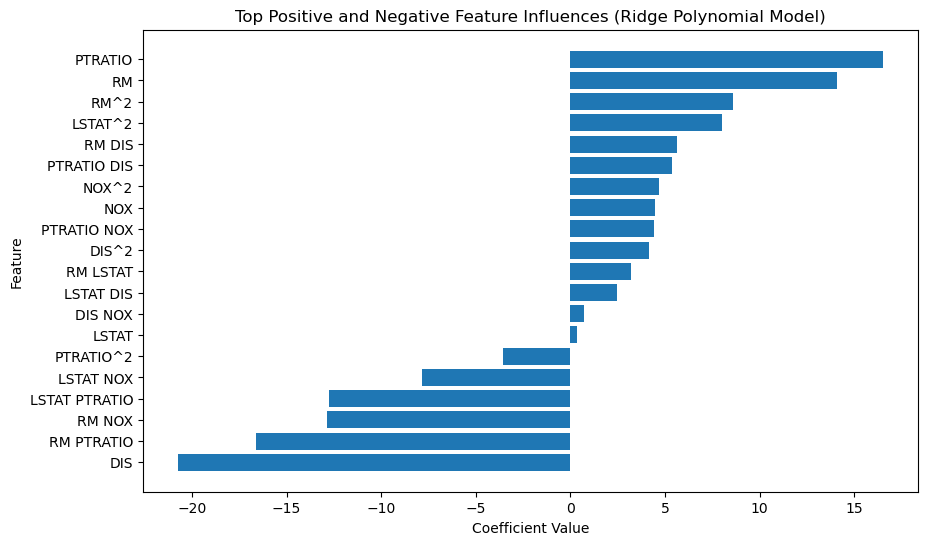

In [16]:
import matplotlib.pyplot as plt

# Top 10 positive and negative coefficients
top_features = pd.concat([importance_df.head(10), importance_df.tail(10)])

plt.figure(figsize=(10,6))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.title("Top Positive and Negative Feature Influences (Ridge Polynomial Model)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

Feature Importance Interpretation

The coefficients above show how each feature (and its combinations) influences the predicted house prices (MEDV).
Positive coefficients mean that as the feature increases, house prices also tend to increase.
Negative coefficients mean the opposite — an increase in that feature tends to reduce house prices.

From the results:

1. RM (average number of rooms) and RM² have strong positive effects, meaning homes with more rooms are typically more expensive, and the effect becomes stronger as room count increases.

2.	LSTAT² also has a notable impact, showing that areas with a high percentage of lower-status residents experience a sharp drop in house value once it passes a certain point.

3. PTRATIO and its interactions show mixed signs, suggesting complex relationships — for instance, high pupil-teacher ratios might reduce value in general, but their impact can vary depending on other factors like distance (DIS).

4. NOX and NOX² highlight how pollution levels influence prices nonlinearly; light pollution might not matter much, but heavy pollution significantly lowers value.

5. Interaction terms like RM×DIS and PTRATIO×DIS reveal how combinations of features (e.g., large homes far from city centers) shape prices differently than when each variable is considered alone.

In short, polynomial features helped the model capture nonlinear trends and interactions that a simple linear model would have missed, leading to better predictions and a more realistic understanding of what affects home prices.

In [18]:
# Finally we can save the trained model for future use without retraining
import joblib

# Save the model
joblib.dump(best_poly_model, 'house_price_model.pkl')

# Load the model later
model = joblib.load('house_price_model.pkl')